## sklearn中的线性回归

In [1]:
#数据集来源：diabets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
data= load_diabetes()

In [7]:
#x_data表示数据集中的特征
#labels表示预测值
x_data= data.data
labels= data.target

In [8]:
x_data.shape

(442, 10)

In [10]:
labels.shape

(442,)

In [15]:
X_data= x_data[:,np.newaxis,2]#抽取其中的第二列作为特征
from sklearn.model_selection import train_test_split#划分数据集用于训练
x_train, x_test, y_train, y_test= train_test_split(X_data,labels, random_state=True,test_size=0.3)

In [23]:
#调用库来拟合
model= LinearRegression(normalize=True)
clf= model.fit(x_train, y_train)
y_predict= clf.predict(x_test)

In [24]:
#测试最小二乘模型在测试集上的均方误差以及R2系数
MSE= mean_squared_error(y_predict,y_test)
R2= r2_score(y_test,y_predict)#要注意位置，真实值放在前面，预测值放在后面，越接近1，模型越好

In [25]:
print("均方误差为：",MSE)
print("R2系数为：",R2)
print("权重为：",clf.coef_)

均方误差为： 4095.914373798433
R2系数为： 0.18642576043332093
权重为： [1030.62089764]


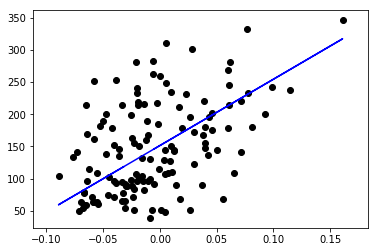

In [19]:
#绘图
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_predict, color= "blue")

## 总结

用一个非常简单的列子调用了sklearn中的最小二乘回归模块，学到了以下内容：
1. sklearn中的最小二乘模块以及其中的参数
2. 线性回归模型的评价指标

In [33]:
np.mean(X_data,axis=0)

array([-8.01395149e-16])

## 自己写最小二乘

根据公式：
<img src="https://miro.medium.com/max/495/1*f_VhshEGxwhT4tZLDzwtgA.png" width= 200 height=200>

In [34]:
def LSR(x, y):
    x_mean= np.mean(x)
    y_mean= np.mean(y)
    fenzi= 0
    fenmu= 0
    for i in range(len(x)):
        fenzi+=(x[i]-x_mean)*(y[i]-y_mean)
        fenmu+=(x[i]-x_mean)**2
    m= fenzi/fenmu
    c= y_mean-m*x_mean
    return m,c

In [40]:
weight, bias= LSR(x_train.flatten(),y_train)

In [41]:
print("权重：",weight)
print("偏置：",bias)

权重： 1030.6208976378798
偏置： 151.41241649570495


In [43]:
y_predict2= x_test*weight+bias

In [44]:
MSE= mean_squared_error(y_test, y_predict2)
R2= r2_score(y_test, y_predict2)
print("均方误差：",MSE)
print("R2误差：",R2)

均方误差： 4095.9143737984323
R2误差： 0.18642576043332115


## 总结
sklearn中的linear_mdoel模块就是用的最小二乘来求解线性回归模型，我从源码角度去用最小二乘求权重和偏置，但是我的代码只能解决只有一维的情况，如果超过了一维则无能为力了